# 项目：TMDB电影数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [2]:
# 用这个框对你计划使用的所有数据包进行设置导入语句。
# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [41]:
#加载数据并打印几行。进行这几项操作，来检查数据类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('~/Downloads/tmdb_movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [40]:
#TMDB数据集中样本数为10866, 列数为21.
df.shape

(10866, 21)

<div class="alert alert-warning" role="alert" style="margin:10px">
<p>**Comments on line [41]**</p>
<p>If you just want to check the data type of all columns, 
df.get_dtype_counts() is handy.</p>

</div>

In [41]:
#TMDB数据集包含21列,其中4列数据类型为float,6列数据类型为integer,11列数据类型为string。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [42]:
#查看TMDB数据集中各列缺失数据的情况
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [43]:
#查看TMDB数据集中的重复行数目
sum(df.duplicated())

1

In [44]:
#查看TMDB数据集中每列的非空唯一值情况
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### TMDB电影数据清理

#### 在简单了解了TMDB数据集的常规属性并确定了要探索的问题后，会在数据清理环节完成以下3步：
第一步  drop本次分析中不需要的列

In [42]:
#drop本次分析不需要的列
df.drop(['imdb_id','budget','revenue','homepage','tagline','keywords','overview','production_companies','vote_count'],axis=1, inplace=True)

<div class="alert alert-warning" role="alert" style="margin:10px">
<p>**Comments**</p>
<p>df.isnull().any(axis=1).sum() gives you total number of rows whose with at least one missing value.</p>
<p>Let us check together which method is faster. </p>
</div>

In [22]:
import time
start_time = time.time()
print df.isnull().any(axis=1).sum() 
print 'Took {} seconds.'.format(time.time()-start_time)


134
Took 0.00592398643494 seconds.


In [23]:
import time
start_time = time.time()
print df.shape[0]-df.dropna().shape[0]
print 'Took {} seconds.'.format(time.time()-start_time)

134
Took 0.00872993469238 seconds.


<div class="alert alert-warning" role="alert" style="margin:10px">
<p>Looks like we got a winner. :)</p>
<p>It actually does not matter much, but it is better to write your code more pythonically. </p>

In [24]:
#查看当前缺失值的行数
df.shape[0]-df.dropna().shape[0]

134

In [25]:
#查看当前各列缺失数值的情况
df.isnull().sum()

id                 0
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

第二步 drop缺失数值的行并进行检查

Sorry I accidentally refreshed your code and changed the line number....

<div class="alert alert-warning" role="alert" style="margin:10px">
<p>It is really dangerous to use inpace=True...</p>
<p>It is better to keep your initial, pure dataset somewhere.</p>
<p>Usually we have different folders for external, interim, and preprocessed data. But it is not something you need to worry about for temporary.</p>

In [43]:
#将缺失数值的行drop掉
df.dropna(inplace=True)

In [44]:
#检查当前数据集中是否还有缺失数值的行
df.isnull().sum().any()

False

第三部 drop数据重复的行并进行检查

In [45]:
#将数值重复的行drop掉
df.drop_duplicates(inplace=True)

In [46]:
#检查当前数据集中是否还有重复行
sum(df.duplicated())

0

#### 将数据集打印几行进行查看并将新数据集进行储存

In [52]:
df.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
#将新数据集进行储存
df.to_csv('~/Downloads/clean_tmdb_movies.csv', index=False)

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1 每年最受欢迎的电影类别是哪些？

### 使用Bar Chart表现年度最受欢迎的电影类型（以最近5年为例）
1. 本次分析将首先对数据集的genres一列进行处理,
2. 然后通过query抽取出包含2010-2015年上映的、受欢迎程度高于平均值的电影的子数据集，
3. 接着获得2015年上映的、受欢迎程度高于平均值的电影子集中genres一列中不同关键词及其出现的次数，
4. 最后根据数据绘制Bar Chart将2010-2015年上映的、受欢迎程度较高的电影的类型进行可视化呈现。

In [63]:
# 用这个代码框和其它代码框探索数据。请务必记得添加Markdown 框，以便记录你的观察和调查结果。
df = pd.read_csv('clean_tmdb_movies.csv')
df.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [64]:
#对数据集的genres一列进行处理
df.genres = df.genres.str.split('|')

In [72]:
#通过query抽取出2010-2015年上映的电影的子集
df_2015 = df.query('release_year==2015')
df_2014 = df.query('release_year==2014')
df_2013 = df.query('release_year==2013')
df_2012 = df.query('release_year==2012')
df_2011 = df.query('release_year==2011')
df_2010 = df.query('release_year==2010')

In [101]:
#获得历年电影受欢迎度的平均值
df.groupby('release_year').popularity.mean()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.489084
1968    0.495726
1969    0.436779
1970    0.341638
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.453760
1975    0.519445
1976    0.474516
1977    0.637528
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590301
1985    0.589466
1986    0.511238
1987    0.506663
1988    0.472000
1989    0.567816
1990    0.535735
1991    0.501090
1992    0.583376
1993    0.549475
1994    0.668825
1995    0.714641
1996    0.606398
1997    0.714033
1998    0.626165
1999    0.645799
2000    0.552952
2001    0.705034
2002    0.705411
2003    0.719083
2004    0.722438
2005    0.632187
2006    0.609710
2007    0.598488
2008    0.594700
2009    0.607770
2010    0.660137
2011    0.682350
2012    0.618454
2013    0.635676
2014    0.907467
2015    1.047620
Name: popularity, dtype: float64

In [85]:
#通过query抽取出2010-2015年上映的、受欢迎度高于平均值的电影的子集
df_2015_pop = df.query('popularity>1.047620')
df_2014_pop = df.query('popularity>0.907467')
df_2013_pop = df.query('popularity>0.635676')
df_2012_pop = df.query('popularity>0.618454')
df_2011_pop = df.query('popularity>0.682350')
df_2010_pop = df.query('popularity>0.660137')

In [86]:
#获得2010-2015年上映的受欢迎电影的类型及其出现次数
genres_2015_pop = []
for a in df_2015_pop['genres']:
    genres_2015_pop.extend(a)

genres_2014_pop = []
for b in df_2014_pop['genres']:
    genres_2014_pop.extend(b)

genres_2013_pop = []
for c in df_2013_pop['genres']:
    genres_2013_pop.extend(c)

genres_2012_pop = []
for d in df_2012_pop['genres']:
    genres_2012_pop.extend(d)

genres_2011_pop = []
for e in df_2011_pop['genres']:
    genres_2011_pop.extend(e)

genres_2010_pop = []
for f in df_2010_pop['genres']:
    genres_2010_pop.extend(f)

In [76]:
count_genres_2015 = pd.Series(genres_2015_pop).value_counts()
count_genres_2014 = pd.Series(genres_2014_pop).value_counts()
count_genres_2013 = pd.Series(genres_2013_pop).value_counts()
count_genres_2012 = pd.Series(genres_2012_pop).value_counts()
count_genres_2011 = pd.Series(genres_2011_pop).value_counts()
count_genres_2010 = pd.Series(genres_2010_pop).value_counts()

<div class="alert alert-warning" role="alert" style="margin:10px">
<p>How about rotate the xticks to 30 degree?</p>
<p>movie_counts_2015 = count_genres_2015.plot.bar(figsize=(16,8),title='2015 Movie Popular Genres Counts', rot=30)
</p>

Text(0,0.5,'Counts')

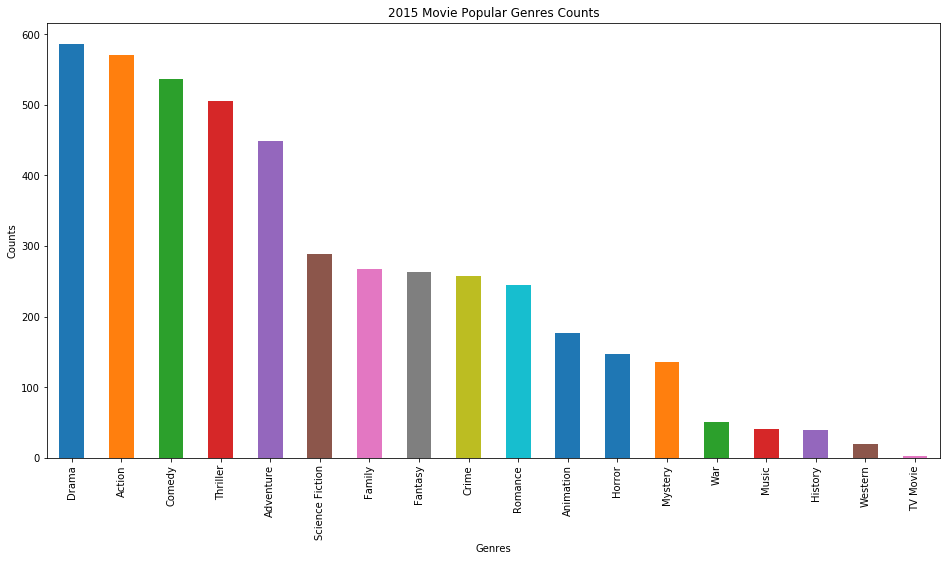

In [88]:
#绘制Bar Chart将2015年上映的、受欢迎程度较高的电影的类型进行可视化呈现
movie_counts_2015 = count_genres_2015.plot.bar(figsize=(16,8),title='2015 Movie Popular Genres Counts')
movie_counts_2015.set_xlabel('Genres')
movie_counts_2015.set_ylabel('Counts')

Text(0,0.5,'Counts')

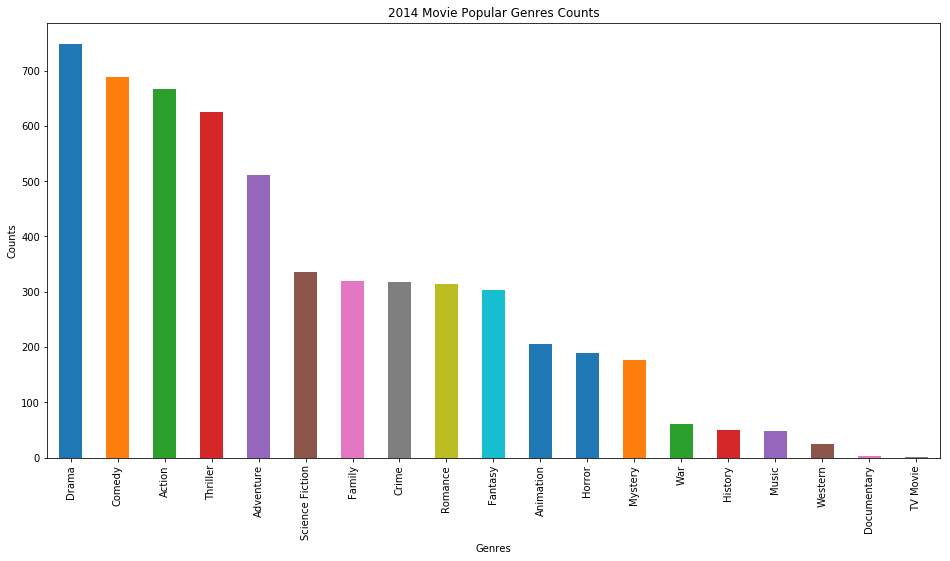

In [89]:
movie_counts_2014 = count_genres_2014.plot.bar(figsize=(16,8),title='2014 Movie Popular Genres Counts')
movie_counts_2014.set_xlabel('Genres')
movie_counts_2014.set_ylabel('Counts')

Text(0,0.5,'Counts')

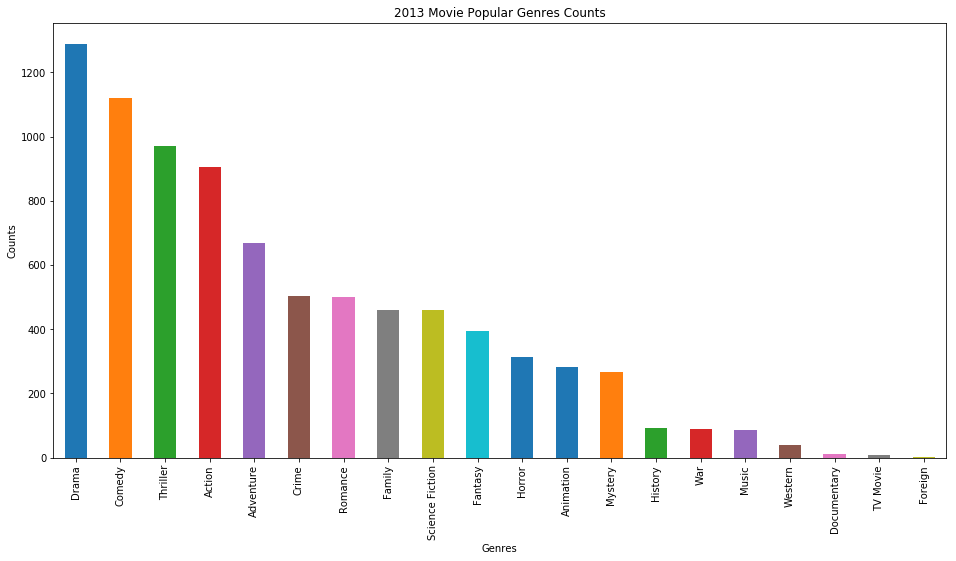

In [90]:
movie_counts_2013 = count_genres_2013.plot.bar(figsize=(16,8),title='2013 Movie Popular Genres Counts')
movie_counts_2013.set_xlabel('Genres')
movie_counts_2013.set_ylabel('Counts')

Text(0,0.5,'Counts')

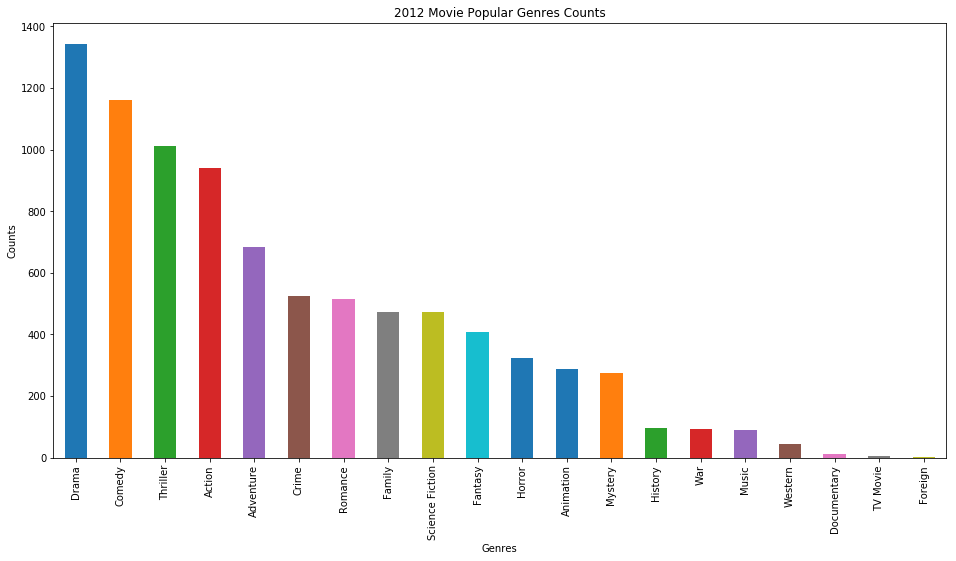

In [91]:
movie_counts_2012 = count_genres_2012.plot.bar(figsize=(16,8),title='2012 Movie Popular Genres Counts')
movie_counts_2012.set_xlabel('Genres')
movie_counts_2012.set_ylabel('Counts')

Text(0,0.5,'Counts')

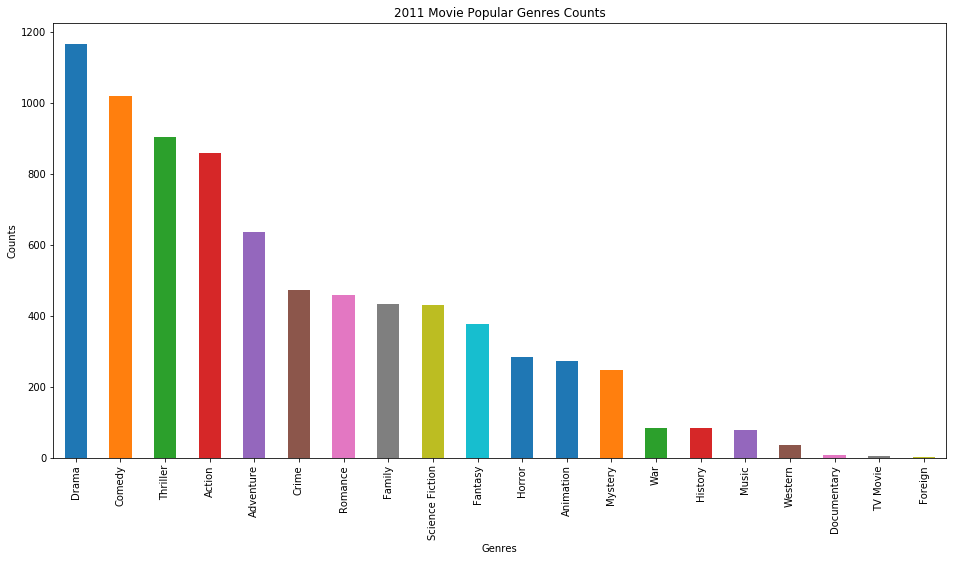

In [92]:
movie_counts_2011 = count_genres_2011.plot.bar(figsize=(16,8),title='2011 Movie Popular Genres Counts')
movie_counts_2011.set_xlabel('Genres')
movie_counts_2011.set_ylabel('Counts')

Text(0,0.5,'Counts')

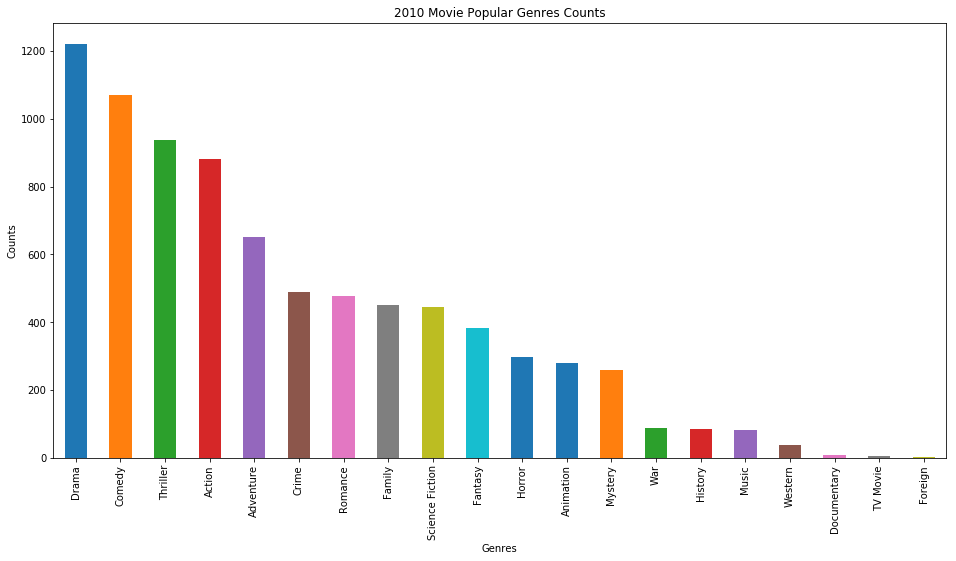

In [93]:
movie_counts_2010 = count_genres_2010.plot.bar(figsize=(16,8),title='2010 Movie Popular Genres Counts')
movie_counts_2010.set_xlabel('Genres')
movie_counts_2010.set_ylabel('Counts')

### 研究问题 2 票房较高的电影通常有哪些特点？

In [51]:
# 请继续探索数据，解决你额外的研究问题。如果有其它问题要调查，请根据需要添加更多标题。
df = pd.read_csv('~/Downloads/clean_tmdb_movies.csv')
df.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


<div class = "alert alert-warning" role = "alert" style = "margin: 10px" </div>
<p>棒！</p>

为了更好地回答问题，将把这个问题拆分成为5个小问题：
1. 高票房电影一般受欢迎吗？
2. 预算高的电影票房一定高吗？
3. 哪位（些）导演指导出了最多的高票房电影？
4. 票房较高的电影通常是什么类别的？
5. 哪位（些）演员出演过最多的高票房电影？

In [70]:
#对TMDB数据集中genres和cast两列数据进行处理
df.genres=df.genres.str.split('|')

In [71]:
df.cast=df.cast.str.split('|')

In [112]:
#计算出电影票房的平均值并从TMDB数据集中提取票房超过平均值的电影子集。
df.revenue_adj.mean()

52006229.43678185

In [72]:
df_high_rev = df.query('revenue_adj > 115215273.41516064')

### 高票房电影一般受欢迎吗？

Text(0,0.5,'Popularity')

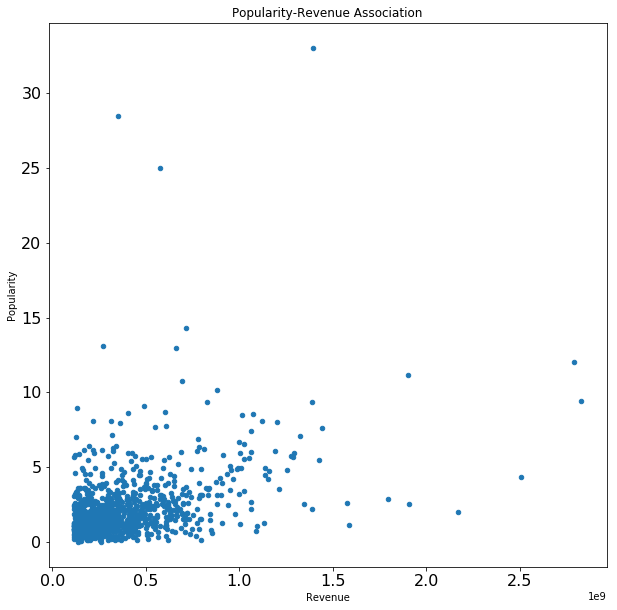

In [121]:
pop_rev=df_high_rev.plot.scatter(x='revenue_adj', y='popularity', title='Popularity-Revenue Association', figsize=(10,10),fontsize=16)
pop_rev.set_xlabel('Revenue')
pop_rev.set_ylabel('Popularity')

根据散点图来看，高票房电影不一定全部受欢迎，但是不受欢迎地电影票房都相对较低。

### 预算高的电影票房一定高吗？

Text(0,0.5,'Budget')

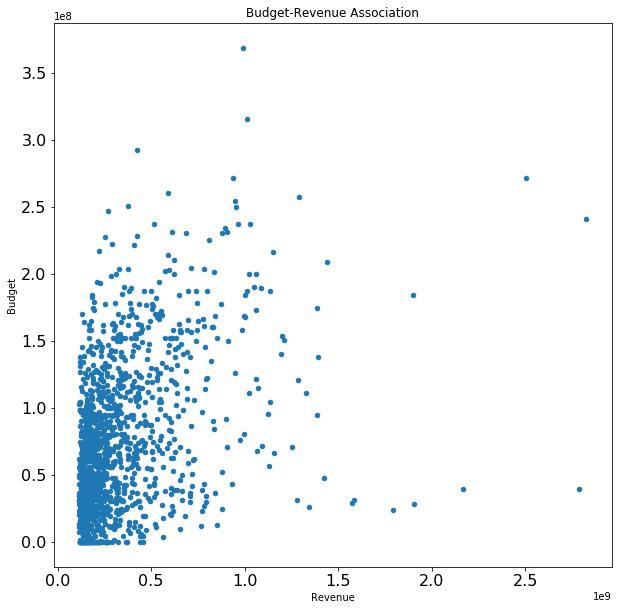

In [122]:
budg_rev = df_high_rev.plot.scatter(x='revenue_adj', y='budget_adj', title='Budget-Revenue Association', figsize=(10,10), fontsize=16)
budg_rev.set_xlabel('Revenue')
budg_rev.set_ylabel('Budget')

从散点图来看，预算高的电影票房不一定高，有几部预算相对较低地电影票房取得了不俗的票房。大部分预算低于1.0e+08的电影票房收入都不超过0.5e+09。

### 哪位（些）导演指导出了最多的高票房电影？

<div class = "alert alert-warning"</div>
<p>count_director_highrev= pd.Series(df_high_rev['director']).value_counts()[:10]</p>

In [128]:
count_director_highrev= pd.Series(df_high_rev['director']).value_counts()[0:10]
count_director_highrev

Steven Spielberg    24
Robert Zemeckis     13
Ron Howard          12
Clint Eastwood      12
Tim Burton          11
Ridley Scott        10
Tony Scott          10
Michael Bay         10
David Fincher        9
Brett Ratner         8
Name: director, dtype: int64

Text(0,0.5,'Movie Counts')

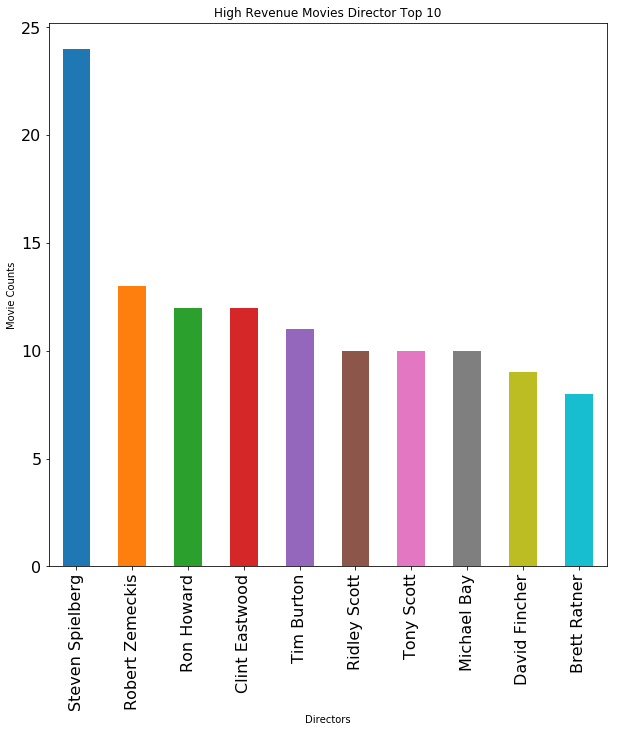

In [127]:
high_rev_dire=count_director_highrev.plot.bar(figsize=(10,10),title='High Revenue Movies Director Top 10', fontsize=16)
high_rev_dire.set_xlabel('Directors')
high_rev_dire.set_ylabel('Movie Counts')

根据series和Bar Chart可以看出，Steven Spielberg指导的高票房电影最多有24部，超过第二名Robert Zemeckis（13部）有11部之多。

### 票房较高的电影通常是什么类别的？

In [129]:
genres_highrev= []
for x in df_high_rev['genres']:
    genres_highrev.extend(x)
    
count_genres_highrev = pd.Series(genres_highrev).value_counts()
count_genres_highrev

Action             504
Drama              483
Comedy             476
Adventure          421
Thriller           396
Family             238
Science Fiction    231
Fantasy            210
Romance            209
Crime              203
Animation          131
Mystery            112
Horror              96
War                 55
Music               49
History             45
Western             22
Documentary          1
dtype: int64

Text(0,0.5,'Counts')

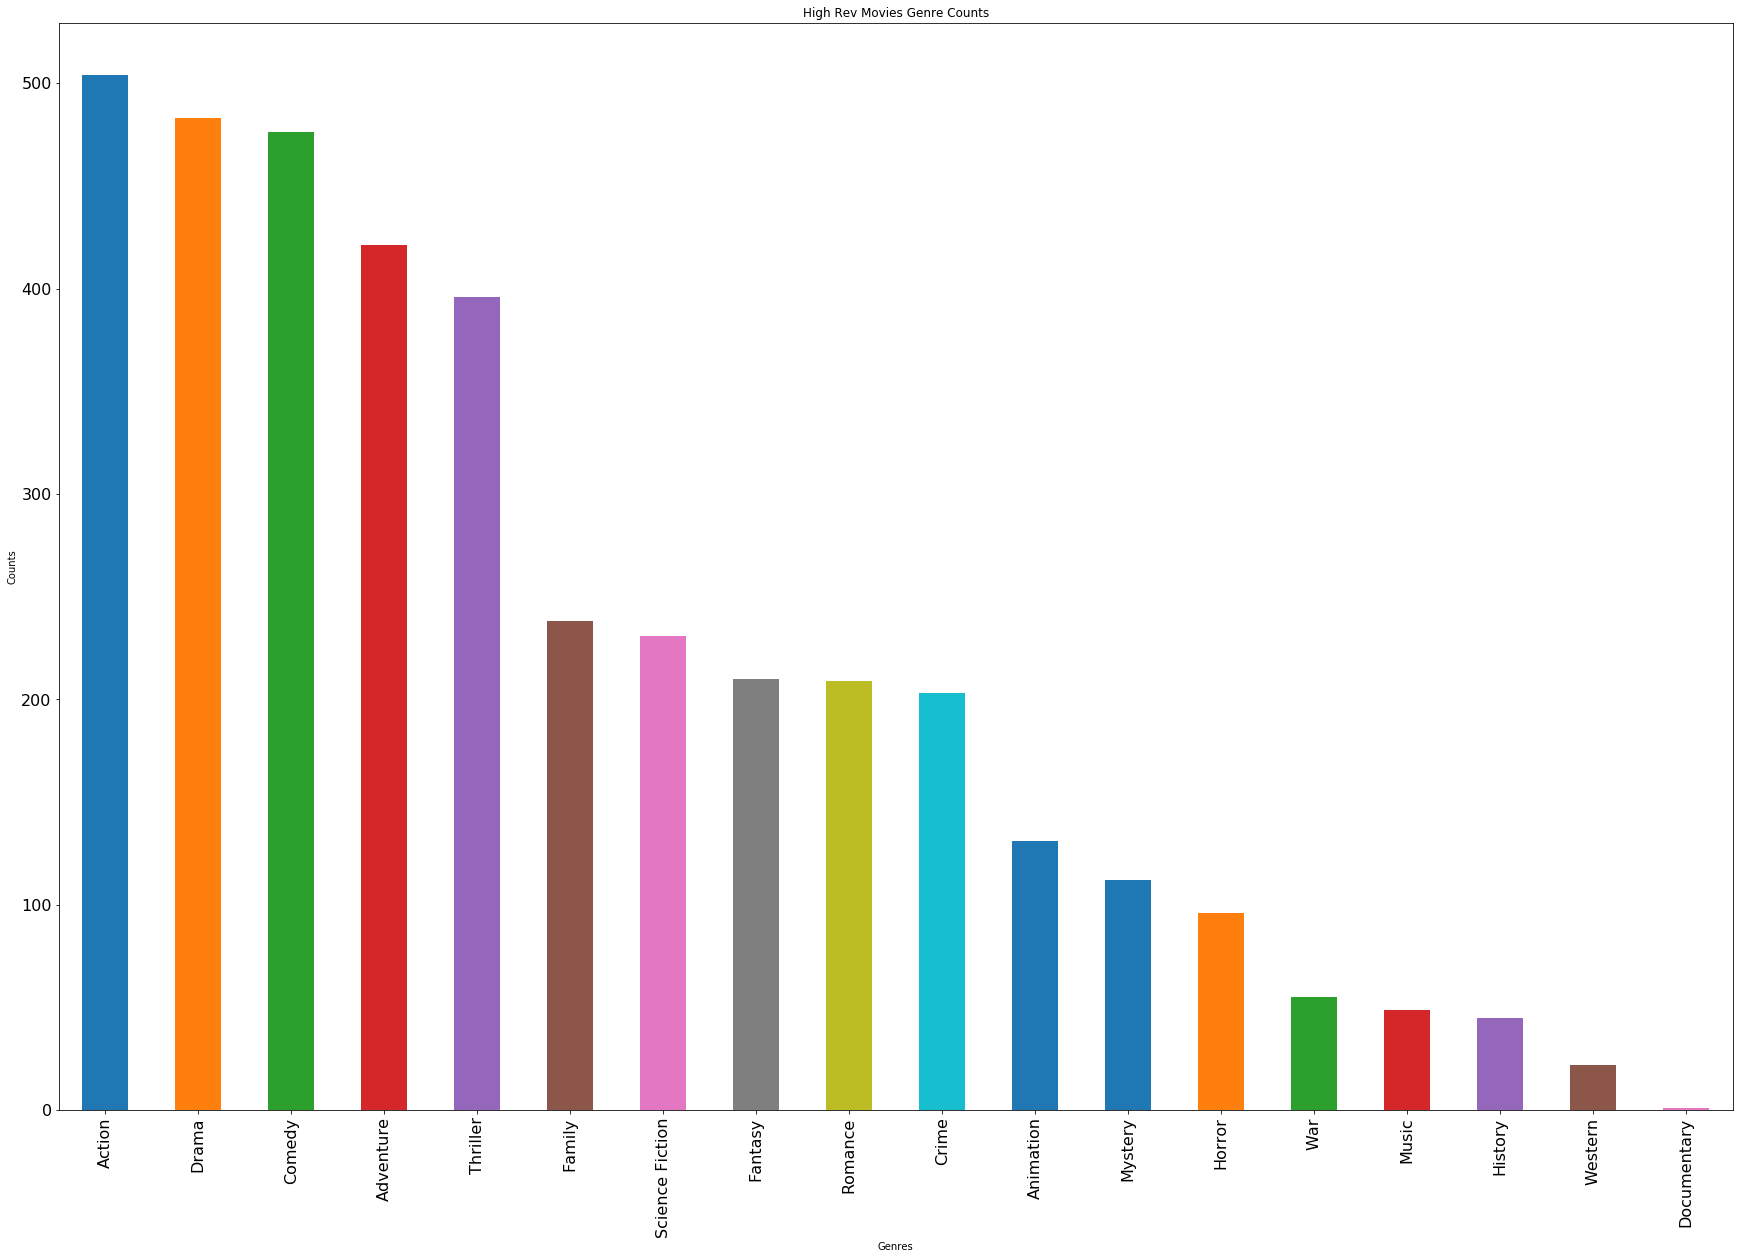

In [131]:
gen_hr = count_genres_highrev.plot.bar(figsize=(30,20), title='High Rev Movies Genre Counts', fontsize=16)
gen_hr.set_xlabel('Genres')
gen_hr.set_ylabel('Counts')

根据series和Bar Chart可以看出，高票房电影中Action类型的电影最多，有504部都属于或部分属于action movie。Drama, Comedy, Advanture三个类型的电也很容易获得高票房。

### 哪位（些）演员出演过最多的高票房电影？

In [133]:
cast_highrev= []
for x in df_high_rev['cast']:
    cast_highrev.extend(x)

count_cast_highrev = pd.Series(cast_highrev).value_counts()[0:10]
count_cast_highrev

Tom Cruise            27
Tom Hanks             25
Brad Pitt             24
Harrison Ford         21
Robert De Niro        21
Sylvester Stallone    20
Bruce Willis          20
Cameron Diaz          20
Eddie Murphy          20
Denzel Washington     20
dtype: int64

Text(0,0.5,'Counts')

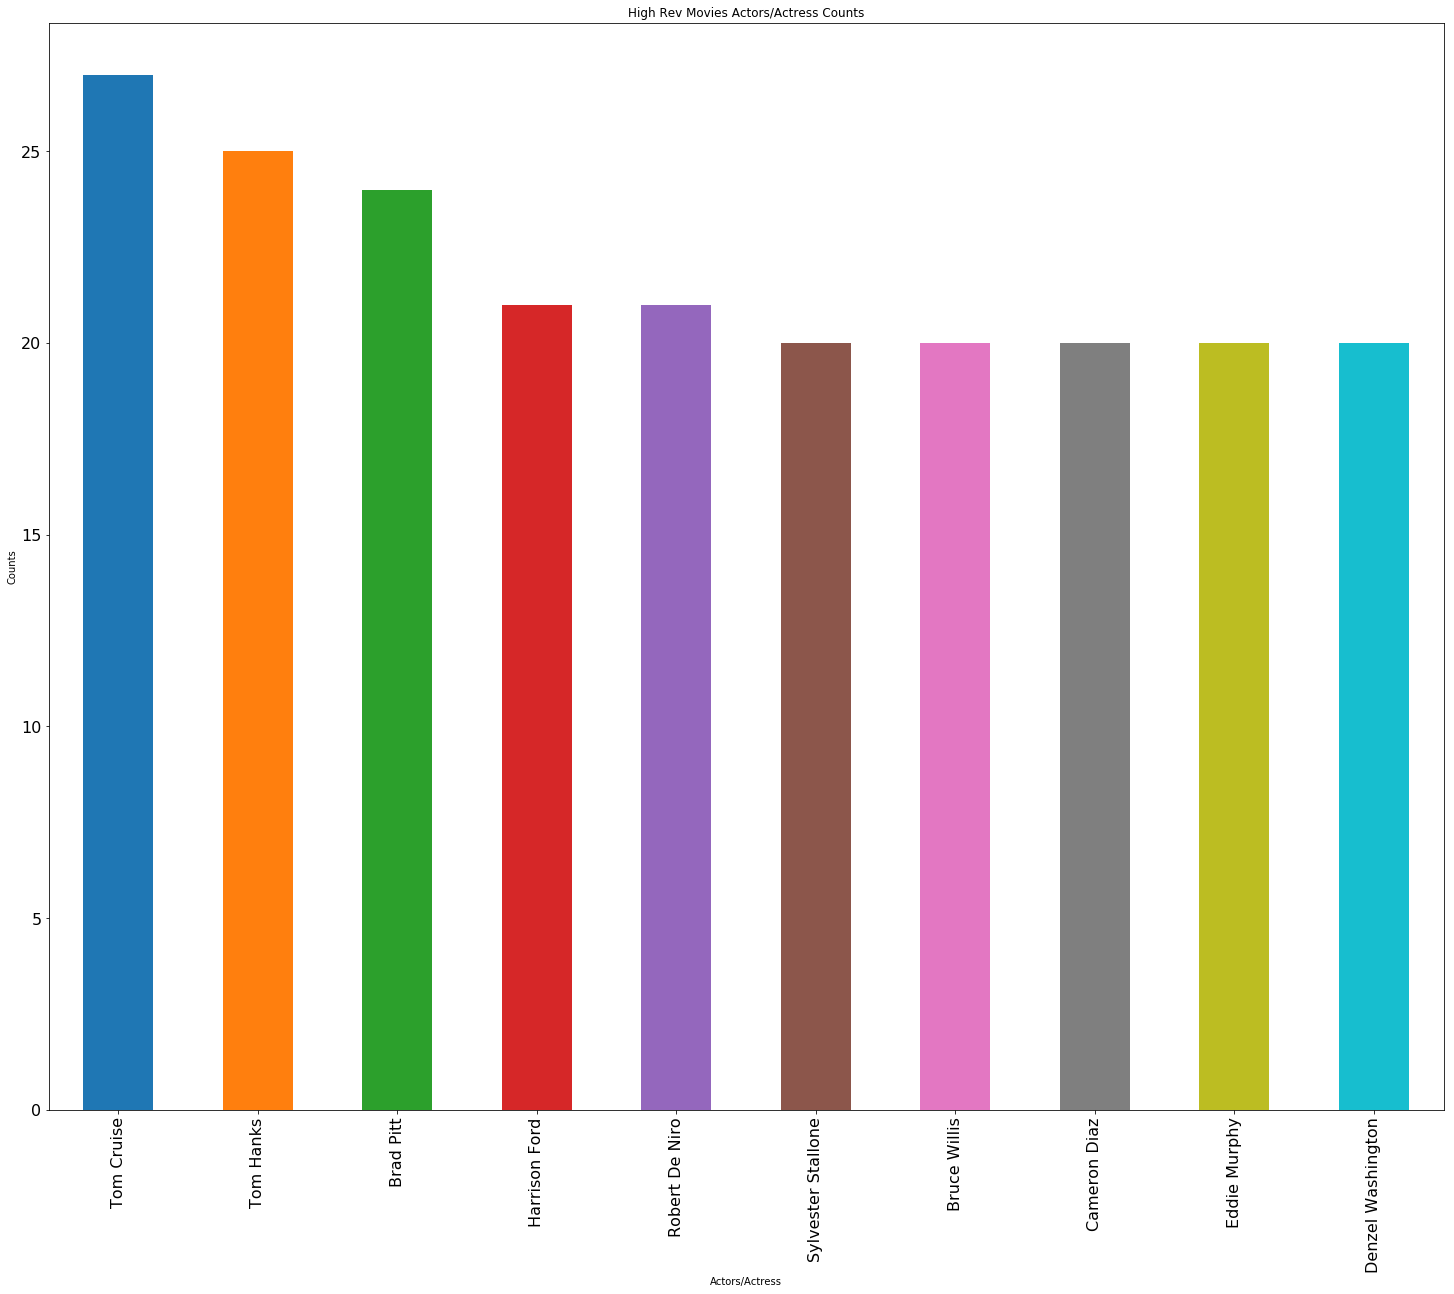

In [135]:
cast_hr=count_cast_highrev.plot.bar(figsize=(25,20), title='High Rev Movies Actors/Actress Counts', fontsize=16)
cast_hr.set_xlabel('Actors/Actress')
cast_hr.set_ylabel('Counts')

根据series和Bar Chart可以看出，Tom Cruise出演的高票房电影最多，有27部。高票房电影演员前十名中只有Cameron Diaz一名女性上榜，她出演过20部高票房电影。

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

## 在本项目中，我主要使用TMDB数据集探索了两个问题：
1. 年最受欢迎的电影类别是哪些？
2. 票房较高的电影通常有哪些特点？

## 在对数据探索过后，我得出的两个问题的答案为：

##### A. 年最受欢迎的电影类别是哪些？

我主要分析了2010年至2015年6年的受欢迎电影的类别数据，得出的结论是：

在这6年中，属于或部分属于Drama这一类别的电影在受欢迎的电影中最常出现；受欢迎的电影中也常常能够找到属于或部分属于comedy, action, adventure以及thriller这四种类型的电影。

##### B. 票房较高的电影通常有哪些特点？

在将这个问题拆分成了5个子问题后，我发现：

a. 电影的票房似乎与其受欢迎程度及其预算没有太大关联;

b. Steven Spielberg, Robert Zemeckis, Ron Howard, Clint Eastwood, Tim Burton, Ridley Scott, Tony Scott, Michael Bay, David Fincher,Brett Ratner等导演在过去导演出的高票房影片较多，排名高票房电影子数据集前10名；

c. 高票房电影中属于或部分属于动作片的电影最多，属于或部分属于剧情、喜剧、冒险三个类型的票房表现也不俗；

d. 出演高票房电影的演员中，Tom Cruise排名首位，出演了27部高票房电影。在高票房演员排行榜前10中，只有1名女性和2名黑人演员，剩余7名全部为白人男性。

## 本次数据分析的局限性：
A. 货币通货膨胀没有纳入考虑范围

由于整个数据集包含了从1960年代到2015年的电影数据，所以在探索高票房电影的特点时应该考虑到货币通货膨胀的因素。一些在今天看来票房不高的老片子有可能时当年的票房神话。

B. 不同年代观影条件不同，受欢迎程度会受影响

1960年代观影条件还相对较差，因此观影人数也会没有之后的观影人数多。因此一些现在看来受欢迎程度不高的电影也许在当年已经是观影人数高峰了。

C. 非英语片数据没有纳入考虑范围

TMDB数据集目前来看主要还是英语片，所以如果假如其他语种的电影分析结果可能会有所不同。

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])